<p> <img src='images/Unifor_vertBlue.png' align="right" width="200px"> </p>

# Atividade 7 - Predição de Links no Grafo de Coautoria do PPGIA<br>
AIRES, Marcos. CARUBBI, Ricardo. SIQUEIRA, Fernando. Alunos de Análise de Dados em Grafos.<br>
Professor orientador: Prof. Dr. Raimir Holanda.<br>
Programa de Pós-Graduação em Informática Aplicada. Universidade de Fortaleza - UNIFOR.




## Resumo

Diversas informações sobre a produção cientı́fica nacional podem ser encontradas na Plataforma Lattes e, assim como as redes sociais, pode-se aplicar os mesmos conceitos para predição de links na rede social acadêmica. Esses links são identificados como coautorias, ou relações entre os pesquisadores na produção de uma publicação, e sua predição facilita e otimiza a produção científica. Este projeto comparou diversas métricas baseadas em similiaridade e proximidade em uma rede de coautoria dos professores do Programa de Pós-graduação em Informática Aplicada (PPGIA) da Universidade de Fortaleza (Unifor). Verificou-se que esta rede de coautoria, gerada em 1989 na abertura da referida pós-graduação, intensificou a colaboração acadêmica entre professores das respectivas áreas de concentração. Contudo apenas um link foi gerado no período de 2014 a 2021 e abordado como um problema de predição de links. Os resultados das diversas métricas não foram promissores sendo apenas um índice favorável à predição da referida coautoria. Conclui-se que para o problema de predição de coautorias em redes sociais acadêmicas é necessário analisar outras métricas e estratégias além das baseadas na estrutura da rede.

## Configurações

In [1]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

import matplotlib.cm as cm
import community as community_louvain
def graph_louvain (G,ano):
    
    # Best partition
    partition = community_louvain.best_partition(G, weight='weight', random_state=1503)
    n_partitions = max(partition.values())+1
    print(f'Número de partições: {n_partitions}')
    
    C_lvn=[]
    for n in range(n_partitions):
        C_lvn.append([k for k, v in partition.items() if v==n])
    print(f'Nós por partição: {C_lvn}')
    
    # Set node and edge communities
    set_node_community(G, C_lvn)
    set_edge_community(G)

    # Set community color for nodes
    node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

    # Set community edges
    C_edges = []
    for n in range(n_partitions+1):
        C_edges.append([(v, w) for v, w in G.edges if G.edges[v, w]['community'] == n])

    # Set community colors
    C_colors = []
    for c in C_edges:
        C_colors.append([get_color(G.edges[e]['community']) for e in c])

    # Set community weights
    C_weights = []
    for l in C_edges:
        C_weights.append([G.get_edge_data(n1,n2)['weight'] for n1,n2 in l])   
        
    cmap = cm.get_cmap('spring', n_partitions)
    
    # Figure
    plt.figure(figsize=(10,8))
    plt.title(f'Detecção de Comunidades em {ano} por Louvain')

    nx.draw_networkx(G,
                     pos=pos,
                     node_size=0,
                     font_size=10,
                     edgelist=C_edges[0],
                     width=C_weights[0],
                     edge_color='silver')

    # Draw C1 edges
    nx.draw_networkx(G,
                     pos=pos,
                     node_size=0,
                     font_size=10,
                     edgelist=C_edges[1],
                     width=C_weights[1],
                     edge_color=C_colors[1])

    # Draw C2 edges
    nx.draw_networkx(G,
                     pos=pos,
                     node_size=0,
                     font_size=10,
                     edgelist=C_edges[2],
                     width=C_weights[2],
                     edge_color=C_colors[2])

    # Draw C3 edges
    nx.draw_networkx(G,
                     pos=pos,
                     node_size=0,
                     font_size=10,
                     edgelist=C_edges[3],
                     width=C_weights[3],
                     edge_color=C_colors[3])

    # Draw edge labels
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,
                                 pos,
                                 edge_labels=labels,
                                 font_size=8, 
                                 verticalalignment='center_baseline', 
                                 alpha=.5)

    nx.draw_networkx_labels(G, 
                            pos, 
                            alpha=.75, 
                            font_size=10)

    nx.draw_networkx_nodes(G, 
                           pos, 
                           partition.keys(), 
                           node_size=300,
                           node_color=node_color)

    plt.show()
    
from matplotlib import pyplot as plt
def graph_mono(G,ano):
    
    # Create figure
    plt.figure(figsize=(8,8))
    plt.title(f'Grafo Monopartido Ponderado PPGIA - Período de 1989 até {ano}')
    # Get weights
    weight = [G.edges[e]['weight'] for e in G.edges]
    # Draw edges, nodes, and labels
    nx.draw_networkx(G,
                     node_color='silver',
                     edge_color='silver',
                     font_size=10,
                     width=weight,
                     pos=pos)
    # Draw labels
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,
                                 pos,
                                 edge_labels=labels,
                                 font_size=8, 
                                 verticalalignment='center_baseline', 
                                 alpha=.5)
    nx.draw_networkx_labels(G, 
                            pos, 
                            font_size=10, 
                            alpha=.75)
    plt.show()
    
def partition(G):
    C_lvn=[]
    partition = community_louvain.best_partition(H, random_state=1503)
    n_partitions = max(partition.values())+1
    for n in range(n_partitions):
        C_lvn.append([k for k, v in partition.items() if v==n])
    return C_lvn

def avalCN(G,n1,n2):
    cn = sorted(nx.common_neighbors(G,n1,n2))
    print(f'Nós avaliados:{n1,n2}')
    print(f'Nó(s) vizinho(s): {cn}')
    print(f'Número de nó(s) vizinho(s) em comum: {len(cn)}\n')

import math
def salton_index(G,n1,n2):
    kx = G.degree[n1]
    ky = G.degree[n2]
    si = len(list(nx.common_neighbors(G,n1,n2)))/math.sqrt(kx*ky)
    print(f'Nós avaliados:{n1,n2}')
    print(f'salton index: {si:.4f}\n')

def sorensen_index(G,n1,n2):
    kx = G.degree[n1]
    ky = G.degree[n2]
    si = 2*len(list(nx.common_neighbors(G,n1,n2)))/(kx+ky)
    print(f'Nós avaliados:{n1,n2}')
    print(f'sorensen index: {si:.4f}\n')

def hub_promoted_index(G,n1,n2):
    kx = G.degree[n1]
    ky = G.degree[n2]
    hub = len(list(nx.common_neighbors(G,n1,n2)))/min(kx,ky)
    print(f'Nós avaliados:{n1,n2}')
    print(f'hub promoted index: {hub:.4f}\n')
    
def hub_depressed_index(G,n1,n2):
    kx = G.degree[n1]
    ky = G.degree[n2]
    hub = len(list(nx.common_neighbors(G,n1,n2)))/max(kx,ky)
    print(f'Nós avaliados:{n1,n2}')
    print(f'hub depressed index: {hub:.4f}\n')
    
def leicht_holme_newman_index(G,n1,n2):
    kx = G.degree[n1]
    ky = G.degree[n2]
    lhn = len(list(nx.common_neighbors(G,n1,n2)))/(kx*ky)
    print(f'Nós avaliados:{n1,n2}')
    print(f'leicht holme newman index: {lhn:.4f}\n')
    
def preferential_attachment(G,n1,n2):
    kx = G.degree[n1]
    ky = G.degree[n2]
    pa = kx*ky
    print(f'Nós avaliados:{n1,n2}')
    print(f'preferential attachment index: {pa:.4f}\n')

## Carregamento do Grafo

In [2]:
# Criação do grafo não direcionado vazio
import datetime as dt
import networkx as nx
A = nx.Graph() # Grafo até o ano de 2010
B = nx.Graph() # Grafo até o ano de 2014
C = nx.Graph() # Grafo do período completo

# Professores do PPGIA
PPGIA = ['Placido Rogerio Pinheiro','Adriano Bessa Albuquerque','Americo Tadeu Falcone Sampaio',
         'Joao Batista Furlan Duarte','Joao Jose Vasco Peixoto Furtado','Maria Andreia Formico Rodrigues',
         'Maria Elizabeth Sucupira Furtado','Nabor das Chagas Mendonça','Napoleao Vieira Nepomuceno',
         'Raimir Holanda Filho','Tarcisio Haroldo Cavalcante Pequeno','Vladia Celia Monteiro Pinheiro']

# Carregamento dos dados no grafo
with open('dataset/ppgia_coautorias.csv') as f:
    next(f)
    for row in f:
        # Definição dos nós
        linha = row.strip().split(";")
        ano = dt.datetime.strptime(linha[0],'%Y')
        artigo = linha[1]
        autor = linha[2]
        ano_p1 = dt.datetime(2010,1,1)
        ano_p2 = dt.datetime(2014,1,1)
        if autor in PPGIA:
            # Grafo de todo o período
            C.add_edge(autor, artigo)
            # Definição dos atributos dos nós
            C.nodes[autor]['autor'] = 1
            C.nodes[artigo]['autor'] = 0
            
            if ano<=ano_p1:
                # Grafo até o ano de 2010
                A.add_edge(autor, artigo)
                A.nodes[autor]['autor'] = 1
                A.nodes[artigo]['autor'] = 0
                
            if ano<=ano_p2:
                # Grafo até o ano de 2014
                B.add_edge(autor, artigo)
                B.nodes[autor]['autor'] = 1
                B.nodes[artigo]['autor'] = 0 

In [3]:
# Renomea os labels dos nós como inteiros sequenciais e atribuir o nome completo como atributo
grafo=[]
for N in [A,B,C]:
    grafo.append(nx.relabel.convert_node_labels_to_integers(N,
                                                            first_label=0, 
                                                            label_attribute='nome'))

In [4]:
# Gera e define o atributo 'bipartite' para identificação dos grupos de autores e artigos
bp_autor=[]
bp_artigos=[]
for N in grafo:
    bp_autor.append([v for v in N.nodes if N.nodes[v]["autor"] == 1])
    bp_artigos.append([v for v in N.nodes if N.nodes[v]["autor"] == 0])

In [5]:
# Gera e define o atributo 'bipartite' para identificação dos grupos de autores e artigos
autores = []
artigos = []
for N in grafo:
    autores.append([v for v in N.nodes if N.nodes[v]["autor"] == 1])
    artigos.append([v for v in N.nodes if N.nodes[v]["autor"] == 0])  

In [6]:
# Gera q quantidade de autores por grafo temporal:
str_grafo=['A','B','C']
for i,j in zip(str_grafo,autores):
    print(f'Número de autores {i}: {len(j)}')

Número de autores A: 12
Número de autores B: 12
Número de autores C: 12


In [7]:
# Gera q quantidade de artigos por grafo temporal:
for i,j in zip(str_grafo,artigos):
    print(f'Número de artigos {i}: {len(j)}')

Número de artigos A: 114
Número de artigos B: 175
Número de artigos C: 304


In [8]:
# Identificação de professores ordenados pelo número de trabalhos publicados
nome_grau=[]
for N in grafo:
    n_grau=nx.get_node_attributes(N, "nome")
    nome_grau.append([(f'nó {x}', n_grau[x], N.degree[x]) for x in sorted(autores[0],
                                                           key=lambda x:N.degree[x],
                                                           reverse=True)])

In [9]:
# Gera um dicionário com nós, nomes dos autores e número de publicações (grau do nó). 
for i,j in zip(str_grafo,nome_grau):
    print(f'Grafo {i}:\n{j}\n')

Grafo A:
[('nó 0', 'Placido Rogerio Pinheiro', 46), ('nó 7', 'Maria Elizabeth Sucupira Furtado', 16), ('nó 11', 'Maria Andreia Formico Rodrigues', 14), ('nó 24', 'Joao Batista Furlan Duarte', 14), ('nó 9', 'Joao Jose Vasco Peixoto Furtado', 12), ('nó 44', 'Adriano Bessa Albuquerque', 9), ('nó 19', 'Nabor das Chagas Mendonça', 8), ('nó 22', 'Raimir Holanda Filho', 4), ('nó 39', 'Americo Tadeu Falcone Sampaio', 3), ('nó 69', 'Napoleao Vieira Nepomuceno', 3), ('nó 37', 'Vladia Celia Monteiro Pinheiro', 2), ('nó 119', 'Tarcisio Haroldo Cavalcante Pequeno', 2)]

Grafo B:
[('nó 0', 'Placido Rogerio Pinheiro', 73), ('nó 7', 'Maria Elizabeth Sucupira Furtado', 24), ('nó 11', 'Maria Andreia Formico Rodrigues', 21), ('nó 9', 'Joao Jose Vasco Peixoto Furtado', 18), ('nó 24', 'Joao Batista Furlan Duarte', 16), ('nó 44', 'Adriano Bessa Albuquerque', 15), ('nó 19', 'Nabor das Chagas Mendonça', 12), ('nó 22', 'Raimir Holanda Filho', 10), ('nó 69', 'Napoleao Vieira Nepomuceno', 7), ('nó 119', 'Tarcisi

## Grafo Monopartido Ponderado de Coautoria.

> Um grafo monopartido U (ou projeção de U) é obtido pela conexão entre dois nós U que compartilham o mesmo nó V na representação bipartida de U". Pode-se definir duas projeções para um grafo bipartido, respectivamente uma projeção de U em V e de V em U.

Barabási, Albert-László ; Pósfai, Márton: Network science. Cambridge : Cambridge University Press, 2016.

In [10]:
# Calculate layout
# pos = nx.spring_layout(G, weight='weight', k=0.1)
from pickle import dump, load
# dump(pos, open('output/pos.pkl', "wb"))
pos=load(open('output/pos.pkl', "rb"))

In [11]:
# Create graph weighted projected
from networkx import bipartite
mono=[]
for i,j in zip(grafo,autores):
    mono.append(bipartite.weighted_projected_graph(i,j))

Número de Arestas: 13


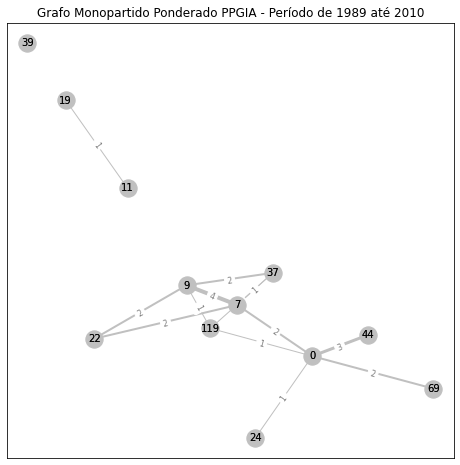

Número de Arestas: 18


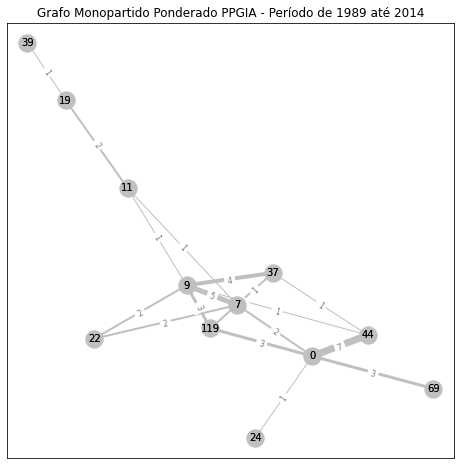

Número de Arestas: 19


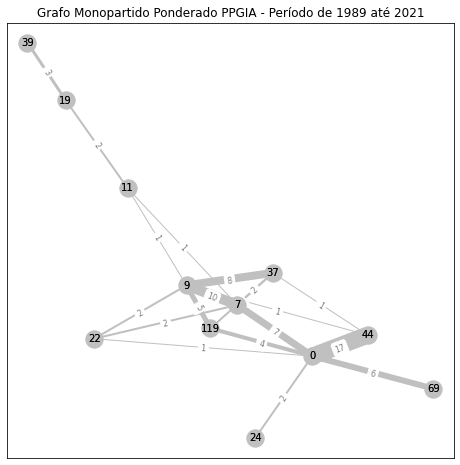

In [12]:
# Gera os grafos monopartido ponderado de acordo com os anos e evidencia a variação de arestas.
anos=[ano_p1.year,ano_p2.year,ano.year]
for i,j in zip(mono,anos):
    print(f'Número de Arestas: {len(i.edges)}')
    graph_mono(i,j)

## Detecção de Comunidades

### Algoritmo de Louvain

> The Louvain algorithm named after its inventors’ home town in Belgium, is a heuristic algorithm for approximately maximizing modularity over divisions of a network into any number of communities. The Louvain algorithm is an agglomerative algorithm, which works by taking single nodes and joining them into groups, then joining groups with other groups, and so forth, in an effort to find the configuration with highest modularity.

Mark Newman. 2010. Networks: An Introduction. Oxford University Press, Inc., USA.<br>
Blondel, V. D., Guillaume, J.-L., Lambiotte, R., and Lefebvre, E., Fast unfolding of communities in large networks, J. Stat. Mech. 2008, P10008 (2008).

In [13]:
# Atribuição de variáveis aos grafos
H=mono[1]
I=mono[2]

Número de partições: 3
Nós por partição: [[0, 24, 44, 69], [7, 9, 22, 37, 119], [11, 19, 39]]


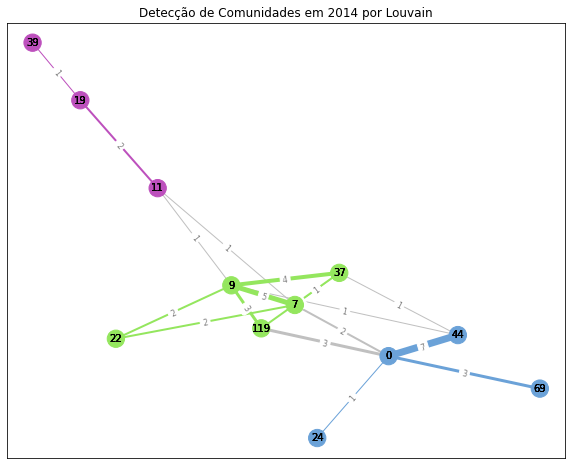

In [14]:
graph_louvain(H,2014)

Número de partições: 3
Nós por partição: [[11, 19, 39], [7, 9, 22, 37, 119], [0, 24, 44, 69]]


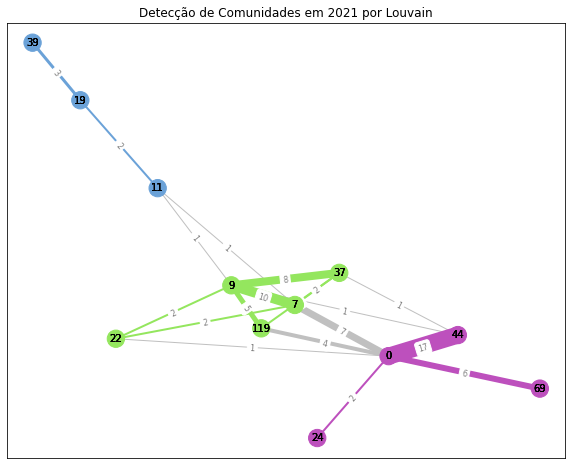

In [15]:
graph_louvain(I,2021)

In [16]:
import community
dendo=[]
for i in mono:
    dendo.append(community.generate_dendrogram(i))
print(dendo)

[[{0: 2, 7: 1, 9: 1, 11: 3, 19: 3, 22: 1, 24: 2, 37: 1, 39: 0, 44: 2, 69: 2, 119: 1}], [{0: 0, 7: 2, 9: 2, 11: 1, 19: 1, 22: 2, 24: 0, 37: 2, 39: 1, 44: 0, 69: 0, 119: 2}], [{0: 0, 7: 2, 9: 2, 11: 1, 19: 1, 22: 2, 24: 0, 37: 2, 39: 1, 44: 0, 69: 0, 119: 2}]]


## Link Prediction

Existem inúmeras métricas para a predição de links, dentre elas estão as métricas baseadas em similaridade (ou proximidade). As técnicas que utilizam essas métricas calculam para cada par de vértices da rede, uma pontuação (score), que representa sua similaridade. Os altos valores de pontuação indicam alta probabilidade de existência do link.

T. Zhou, L. Lu, Y.-C. Zhang. Predicting missing links via local information. Eur. Phys. J. B 71 (2009) 623. https://arxiv.org/pdf/0901.0553.pdf

In [17]:
# Aresta a ser predita pela diferença entre as arestas dos grafos de 2021 e 2014.
aresta_pred = [e for e in I.edges if e not in H.edges]
print(f'Aresta a ser predita: {aresta_pred}')
nos_pred = [e for l in aresta_pred for e in l]
print(f'Nós da aresta a ser predita: {nos_pred}')

Aresta a ser predita: [(0, 22)]
Nós da aresta a ser predita: [0, 22]


In [18]:
# Nós das comunidades identificados por Louvain.
C1,C2,C3 = partition(H)
print(f'Nós da comunidade 1 em 2014: {C1}')
print(f'Nós da comunidade 2 em 2014: {C2}')
print(f'Nós da comunidade 3 em 2014: {C3}')

Nós da comunidade 1 em 2014: [0, 24, 44, 69]
Nós da comunidade 2 em 2014: [7, 9, 22, 37, 119]
Nós da comunidade 3 em 2014: [11, 19, 39]


In [19]:
# Identificar os nós da comunidade C2 que poderiam formar aresta com nó 22.
nos_comp=[]
for i in C2:
    if i not in list(H.neighbors(C2[2]))+[nos_pred[1]]:
        nos_comp.append(i)
print(f'Nós possíveis: {nos_comp}')

Nós possíveis: [37, 119]


In [20]:
# Nós a serem avaliados
nos=[nos_pred[0]]+nos_comp
nos

[0, 37, 119]

### Índice de Vizinhos em Comum

Vizinhos em Comum (Common Neighbors) define a quantidade de vizinhos em comum entre um par de nós. À medida que a quantidade de vizinhos em comum cresce, a chance dos dois nós terem um link entre si aumenta.

$$s_{xy} = |Γ (x) ∩ Γ (y)|$$

Sendo $Γ(x)$ o conjunto de vizinhos do vértice x e $|Γ(x)|$ a quantidade de vizinhos do
vértice x, isto é, o grau do vértice.

In [21]:
for i in range(len(nos)):
    avalCN(H,nos_pred[1],nos[i])

Nós avaliados:(22, 0)
Nó(s) vizinho(s): [7]
Número de nó(s) vizinho(s) em comum: 1

Nós avaliados:(22, 37)
Nó(s) vizinho(s): [7, 9]
Número de nó(s) vizinho(s) em comum: 2

Nós avaliados:(22, 119)
Nó(s) vizinho(s): [9]
Número de nó(s) vizinho(s) em comum: 1



Pode-se concluir que, através do número de vizinhos comuns, a probabilidade da geração da aresta (22,37) é duas vezes maior que a aresta (22,0) ou da aresta (22,119).

### Coeficiente de Jaccard

Coeficiente de Jaccard [1] é uma métrica de similaridade que normaliza a quantidade de vizinhos em comum.

$$s_{xy}=\frac{|Γ (x) ∩ Γ (y)|}{|Γ (x) ∪ Γ (y)|}$$

1. P. Jaccard, Bulletin de la Societe Vaudoise des Science Naturelles 37, 547 (1901)

In [22]:
for i in range(len(nos)):
    print(f'Nós avaliados:{nos_pred[1],nos[i]}')
    for u, v, p in nx.jaccard_coefficient(H,[(nos_pred[1],nos[i])]):
        print(f'jaccard index: {p:.4f}\n')

Nós avaliados:(22, 0)
jaccard index: 0.1667

Nós avaliados:(22, 37)
jaccard index: 0.5000

Nós avaliados:(22, 119)
jaccard index: 0.2500



Pode-se concluir que, baseado no índice de Jaccard, a probabilidade da geração da aresta (22,37) é 299,94% maior que a aresta (22,0), assim como a aresta (22,119) com 149,97%.

### Índice de Adamic-Adar

Índice de Adamic-Adar [1] é uma métrica de similaridade que pondera a vizinhança em comum entre os vértices. Para isso, atribui maior peso aos vizinhos em comum com menor quantidade de arestas.

$$S_{xy}=\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{\log |\Gamma(w)|}$$

onde $Γ(u)$ denota um conjunto de vizinhos de $u$. Este índice leva à divisão zero para nós conectados apenas por meio de loops. Ele deve ser usado quando não houver self-loops presentes.

1. L. A. Adamic, E. Adar, Social Networks 25, 211 (2003).

In [23]:
for i in range(len(nos)):
    print(f'Nós avaliados:{nos_pred[1],nos[i]}')
    for u, v, p in nx.adamic_adar_index(H,[(nos_pred[1],nos[i])]):
        print(f'Adamic-Adar Index: {p:.4f}\n')

Nós avaliados:(22, 0)
Adamic-Adar Index: 0.6213

Nós avaliados:(22, 37)
Adamic-Adar Index: 1.1794

Nós avaliados:(22, 119)
Adamic-Adar Index: 0.5581



Pode-se concluir que, baseado no índice de Adamic-Adar, a probabilidade da geração da aresta (22,37) é 189.83% em relação à aresta (22,0), assim como a aresta (22,119) com 89.83%. Este índice de predição não atesta a existência da aresta (22,0) em 2021.

### Conexão Preferencial

Conexão Preferencial (Preferential Attachment) [1][2] é uma métrica onde as chances de um vértice estar conectado a outro vértice em uma rede é proporcional ao produto do número de vizinhos que cada um possui. A ideia é que novos relacionamentos têm mais chances de correr com pessoas que têm muitos relacionamentos (conhecido como o rico fica mais rico) [3].

$$s_{xy} = {{k_{(x)} \times k_{(y)}}}$$

1. ADAMIC, L.; ADAR, E. Friends and neighbors on the web. Social Networks, v. 25, p.211–230, 2001.
2. BARABáSI, A. L. et al. Evolution of the social network of scientific collaborations. Physica A: Statistical Mechanics and its Applications, v. 311, n. 3-4, p. 590–614, 2002.
3. HASAN, M.; ZAKI, M. A survey of link prediction in social networks. In: AGGARWAL, C. C. (Ed.). Social Network Data Analytics. [S.l.]: Springer US, 2011.

In [24]:
for i in range(len(nos)):
    preferential_attachment(H,nos_pred[1],nos[i])

Nós avaliados:(22, 0)
preferential attachment index: 10.0000

Nós avaliados:(22, 37)
preferential attachment index: 8.0000

Nós avaliados:(22, 119)
preferential attachment index: 6.0000



Pode-se concluir que, baseado no índice Preferential Attachment, a probabilidade da geração da aresta (22,37) é de 80% em relação à aresta (22,0), assim como a aresta (22,119) de 60%. Este índice de predição atesta com a existência da aresta (22,0) em 2021.

### Índice de Salton

Salton ou Similaridade Cosseno [1] é uma medida da similaridade entre dois vetores que mede o cosseno do ângulo entre os mesmos.

$$s_{xy}=\frac{|Γ_(x) ∩ Γ (y)|}{\sqrt{k_{(x)} \times k_{(y)}}}$$

onde $k(x) = |Γ (x)|$ denota o grau de $x$.

1. G. Salton, M. J. McGill, Introduction to Modern Information Retrieval (MuGraw-Hill, Auckland, 1983).

In [25]:
for i in range(len(nos)):
    salton_index(H,nos_pred[1],nos[i])

Nós avaliados:(22, 0)
salton index: 0.3162

Nós avaliados:(22, 37)
salton index: 0.7071

Nós avaliados:(22, 119)
salton index: 0.4082



Pode-se concluir que, baseado no índice de Salton, a probabilidade da geração da aresta (22,37) é 223,63% maior que a aresta (22,0), assim como a aresta (22,119) com 129,10%.

### Índice de Sørensen

A métrica de S∅rensen [1] é usada para medir a similaridade entre duas amostras, frequentemente empregado em análises de comunidades ecológicas.

$$s_{xy}=\frac{|Γ_(x) ∩ Γ (y)|}{{k_{(x)} + k_{(y)}}}$$

1. T. Sørensen, Biol. Skr. 5, 1 (1948).

In [26]:
for i in range(len(nos)):
    sorensen_index(H,nos_pred[1],nos[i])

Nós avaliados:(22, 0)
sorensen index: 0.2857

Nós avaliados:(22, 37)
sorensen index: 0.6667

Nós avaliados:(22, 119)
sorensen index: 0.4000



Pode-se concluir que, baseado no índice de Sørensen, a probabilidade da geração da aresta (22,37) é 233,36% em relação à aresta (22,0), assim como a aresta (22,119) com 140,01%. Este índice de predição não atesta a existência da aresta (22,0) em 2021.

### Índice Hub Promoted

A métrica Hub Promoted Index [1] foi proposta para medir a sobreposição topológica de pares de substratos de redes metabólicas.

$$s_{xy}=\frac{|Γ_(x) ∩ Γ (y)|}{\min({k_{(x)},k_{(y))}}}$$

1. E. Ravasz, A. L. Somera, D. A. Mongru, Z. N. Oltvai, A.-L. Barabási, Science 297, 1553 (2002).

In [27]:
for i in range(len(nos)):
    hub_promoted_index(H,nos_pred[1],nos[i])

Nós avaliados:(22, 0)
hub promoted index: 0.5000

Nós avaliados:(22, 37)
hub promoted index: 1.0000

Nós avaliados:(22, 119)
hub promoted index: 0.5000



Pode-se concluir que, baseado no índice Hub Promoted, a probabilidade da geração da aresta (22,37) é 250,00% em relação à aresta (22,0), assim como a aresta (22,119) com 166,65%. Este índice de predição não atesta a existência da aresta (22,0) em 2021.

### Índice Hub Depressed

Hub Depressed Index [1] é a métrica oposta a métrica anterior.

$$s_{xy}=\frac{|Γ_(x) ∩ Γ (y)|}{\max({k_{(x)},k_{(y))}}}$$

1. ZHOU, T.; L, L.; ZHANG, Y.-C. Predicting missing links via local information. The European Physical Journal B, Springer-Verlag, v. 71, n. 4, p. 623–630, 2009.

In [28]:
for i in range(len(nos)):
    hub_depressed_index(H,nos_pred[1],nos[i])

Nós avaliados:(22, 0)
hub depressed index: 0.2000

Nós avaliados:(22, 37)
hub depressed index: 0.5000

Nós avaliados:(22, 119)
hub depressed index: 0.3333



Pode-se concluir que, baseado no índice Hub Promoted, a probabilidade da geração da aresta (22,37) é 250,00% em relação à aresta (22,0), assim como a aresta (22,119) com 166,65%. Este índice de predição não atesta a existência da aresta (22,0) em 2021.

### Índice de Leicht-Holme-Newman

O índice de Leicht-Holme-Newman [1] é uma medida de similaridade proposta com base no conceito de que dois vértices são semelhantes se os seus vizinhos na rede também são semelhantes.

$$s_{xy}=\frac{|Γ_(x) ∩ Γ (y)|}{{k_{(x)} \times k_{(y)}}}$$

onde o denominador, $k(x)×k(y)$, é proporcional ao número esperado de viznhos comuns dos nós $x$ e $y$.

1. LEICHT, E. A.; HOLME, P.; NEWMAN, M. E. J. Vertex similarity in networks. Phys. Rev. E, American Physical Society, v. 73, p. 026120, Feb 2006.

In [29]:
for i in range(len(nos)):
    leicht_holme_newman_index(H,nos_pred[1],nos[i])

Nós avaliados:(22, 0)
leicht holme newman index: 0.1000

Nós avaliados:(22, 37)
leicht holme newman index: 0.2500

Nós avaliados:(22, 119)
leicht holme newman index: 0.1667



Pode-se concluir que, baseado no índice de Leicht-Holme-Newman, a probabilidade da geração da aresta (22,37) é 250% em relação à aresta (22,0), assim como a aresta (22,119) com 166,67%. Este índice de predição não atesta a existência da aresta (22,0) em 2021.

### Alocação de Recurso

Resource Allocation é uma métrica que, dado um par de vértices não conectados diretamente, tenta mensurar a transmissão de recursos entre estes vértices. Para um vértice $x$ enviar um recurso para o vértice $y$, tem-se a utilização dos vértices vizinhos para transmissão. No caso mais simples, assume-se que cada transmissor possui uma unidade de recurso e a distribuição é feita igualmente para todos os vizinhos. Portanto a similaridade é dada pela quantidade de recursos que $y$ recebe de $x$.

$$S_{xy}=\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$$

onde $Γ(u)$ denota o conjunto de nós vizinhos de $u$.

1. OU, Q. et al. Power-law strength-degree correlation from resource-allocation dynamics on weighted networks. Physical Review E, v. 75, n. 2, p. 021102, 2007.

In [30]:
for i in range(len(nos)):
    print(f'Nós avaliados:{nos_pred[1],nos[i]}')
    for u, v, p in nx.resource_allocation_index(H,[(nos_pred[1],nos[i])]):
        print(f'Resource Allocation index: {p:.4f}\n')

Nós avaliados:(22, 0)
Resource Allocation index: 0.2000

Nós avaliados:(22, 37)
Resource Allocation index: 0.3667

Nós avaliados:(22, 119)
Resource Allocation index: 0.1667



Pode-se concluir que, baseado no índice Resource Allocation Index, a probabilidade da geração da aresta (22,37) é 183.35% em relação à aresta (22,0), assim como a aresta (22,119) com 83.35%. Este índice de predição não atesta a existência da aresta (22,0) em 2021.

### Índice Cn Soundarajan Hopcroft

O índice Cn Soundarajan Hopcroft computa o número de nós vizinhos comuns de $u$ e $v$ e bonifica a cada nó vizinho comum que pertence a mesma comunidade de $u$ e $v$.

$$S_{xy}=|\Gamma(u) \cap \Gamma(v)| + \sum_{w \in \Gamma(u) \cap \Gamma(v)} f(w)$$

onde $f(w)$ igual a 1 se $w$ pertence a mesma comunidade de $u$ e $v$ ou igual a zero se contraário e $Γ(u)$ denota o conjunto de nós vizinhos de $u$.

In [31]:
for i in range(len(nos)):
    print(f'Nós avaliados:{nos_pred[1],nos[i]}')
    for u, v, p in nx.cn_soundarajan_hopcroft(H,[(nos_pred[1],nos[i])]):
        print(f'cn Soundarajan Hopcroft index: {p:.4f}\n')

Nós avaliados:(22, 0)
cn Soundarajan Hopcroft index: 1.0000

Nós avaliados:(22, 37)
cn Soundarajan Hopcroft index: 4.0000

Nós avaliados:(22, 119)
cn Soundarajan Hopcroft index: 2.0000



Pode-se concluir que, baseado no índice de CN Soundarajan Hopcroft, a probabilidade da geração da aresta (22,37) é 400% em relação à aresta (22,0), assim como a aresta (22,119) com 200%. Este índice de predição não atesta a existência da aresta (22,0) em 2021.

### Índice Ra Soundarajan Hopcroft

Calcula o índice de alocação de recursos de todos os pares de nós usando informações da comunidade. Seja os nós $u$ e $v$, esta função calcula o índice de alocação de recursos considerando apenas vizinhos comuns pertencentes à mesma comunidade que $u$ e $v$

$$S_{xy}=\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{f(w)}{|\Gamma(w)|}$$

onde $f(w)$ igual a 1 se $w$ pertence a mesma comunidade de $u$ e $v$ ou igual a zero se contraário e $Γ(u)$ denota o conjunto de nós vizinhos de $u$.

In [32]:
for i in range(len(nos)):
    print(f'Nós avaliados:{nos_pred[1],nos[i]}')
    for u, v, p in nx.ra_index_soundarajan_hopcroft(H,[(nos_pred[1],nos[i])]):
        print(f'Ra Index Soundarajan Hopcroft: {p:.4f}\n')

Nós avaliados:(22, 0)
Ra Index Soundarajan Hopcroft: 0.0000

Nós avaliados:(22, 37)
Ra Index Soundarajan Hopcroft: 0.3667

Nós avaliados:(22, 119)
Ra Index Soundarajan Hopcroft: 0.1667



Como este índice prevê apenas links em nós de mesma comunidade, e portanto, não atesta a existência da aresta (22,0) em 2021, pois seus repsectivos nós pertences à comunidades diferentes.

### Intra e Inter Cluster

Calcula a proporção de vizinhos comuns dentro e entre clusters de todos os pares de nós. Seja os nós $u$ e $v$, se um nó vizinho comum $w$ pertencer à mesma comunidade de $u$ e $v$, $w$ é considerado como um nó vizinho comum dentro do cluster de $u$ e $v$. Caso contrário, é considerado nós vizinho comum intercluster de $u$ e $v$. A proporção entre o tamanho do conjunto de nós vizinhos comuns dentro e entre os clusters é definida como a métrica WIC.

In [33]:
for i in range(len(nos)):
    print(f'Nós avaliados:{nos_pred[1],nos[i]}')
    for u, v, p in nx.within_inter_cluster(H,[(nos_pred[1],nos[i])]):
        print(f'WIC index: {p:.4f}\n')

Nós avaliados:(22, 0)
WIC index: 0.0000

Nós avaliados:(22, 37)
WIC index: 2000.0000

Nós avaliados:(22, 119)
WIC index: 1000.0000



Como este índice prevê apenas links em nós de mesma comunidade, e portanto, não atesta a existência da aresta (22,0) em 2021, pois seus respectivos nós pertences à comunidades diferentes.

### Centralidade de Vizinho Communs

Calcula a pontuação do algoritmo Common Neighbor Centrality (CCPA) de todos os pares de nós. A pontuação CCPA de $u$ e $v$ é definida como:

$$ \ alpha \ cdot (| \ Gamma (u) {\ cap} ^ {} \ Gamma (v) |) + (1- \ alpha) \ cdot \ frac {N} {{d} _ {uv}} $$

onde $Γ(u)$ é o conjunto de nós vizinhos de $u$, $Γ(v)$ é o conjunto de nós vizinhos de $v$, $α$ é o parâmetro que varia entre [0,1], N corresponde ao número total de nós no grafo e $duv$ é a distância mais curta entre os nós $u$ e $v$.

Este algoritmo é baseado em duas propriedades vitais dos nós: o número de nós vizinhos comuns e sua centralidade.

In [34]:
for i in range(len(nos)):
    print(f'Nós avaliados:{nos_pred[1],nos[i]}')
    for u, v, p in nx.common_neighbor_centrality(H,[(nos_pred[1],nos[i])]):
        print(f'CCPA index: {p:.4f}\n')

Nós avaliados:(22, 0)
CCPA index: 2.0000

Nós avaliados:(22, 37)
CCPA index: 2.8000

Nós avaliados:(22, 119)
CCPA index: 2.0000



Pode-se concluir que, baseado no índice de Common Neighbor Centrality, a probabilidade da geração da aresta (22,37) é 140% em relação à aresta (22,0). A probabilidade da aresta (22,119) é igual a da aresta (22,0). Este índice de predição não atesta a existência da aresta (22,0) em 2021.